In [ ]:
# 🎯 Objective
# Build a baseline Multiple Linear Regression using OLS (Normal Equation).

MAE: 24659.36800192266
MSE: 1463421280.6147816
R2: 0.7679609422750722
OLS RMSE: 38254.68965518844


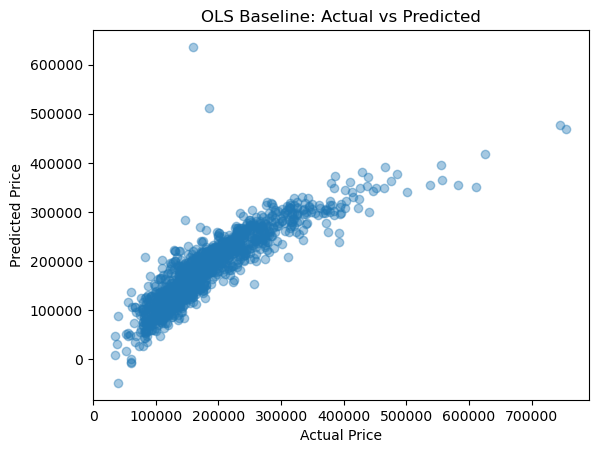

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("train.csv")

FEATURES = [
    "GrLivArea",
    "OverallQual",
    "TotalBsmtSF",
    "GarageCars",
    "YearBuilt",
    "SalePrice"
]

df = df[FEATURES]
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0)
df["GarageCars"] = df["GarageCars"].fillna(0)

# Prepare X, y
X = df.drop("SalePrice", axis=1).values
y = df["SalePrice"].values.reshape(-1,1)

# Add bias
X = np.c_[np.ones(X.shape[0]), X]

# OLS
betas = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
y_pred_ols = np.dot(X, betas)                 # y = XB

# Metrics
def mae(y, yhat):
    return np.mean(np.abs(y - yhat))

def mse(y, yhat):
    return np.mean((y - yhat)**2)

def rmse(y, yhat):
    return np.sqrt(mse(y, yhat))

def r2(y, yhat):
    r2 = 1 - np.sum((y - yhat)**2) / np.sum((y - np.mean(y))**2)
    return r2
    
rmse_ols = rmse(y, y_pred_ols)

print("MAE:", mae(y, y_pred_ols))
print("MSE:", mse(y, y_pred_ols))
print("R2:", r2(y, y_pred_ols))
print("OLS RMSE:", rmse_ols)

# Plot
plt.scatter(y, y_pred_ols, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("OLS Baseline: Actual vs Predicted")
plt.show()
